# 模型预处理
1. 从外部源获取样本数据
2. 创建试验样本数据
3. 把数据调整为标准正态分布
4. 用阈值创建二元特征
5. 分类变量处理
6. 标签特征二元化
7. 处理缺失值
8. 用管线命令处理多个步骤
9. 用主成分分析降维
10. 用因子分析降维
11. 用核PCA实现非线性降维
12. 用截断奇异值分解降维
13. 用字典学习分解法分类
14. 用管线命令连接多个转换方法
15. 用正态随机过程处理回归
16. 直接定义一个正态随机过程对象
17. 用随机梯度下降处理回归

## 简介
本章介绍***数据获取（setting data）***，***数据整理（preparing data）***和***建模前的降维（premodel dimensionality reduction）***工作。这些内容并非机器学习（machinelearning，ML）最核心的部分，但是它们往往决定模型的成败。

本章主要分三部分。首先，我们介绍***如何创建模拟数据（fake data）***，这看着微不足道，但是创建模拟数据并用模型进行拟合是模型测试的重要步骤。更重要的是，当我们从零开始一行一行代码实现一个算法时，我们想知道算法功能是否达到预期，这时手上可能没有数据，我们可以创建模拟数据来测试。之后，我们将介绍一些数据预处理变换的方法，包括***缺失数据填补（data imputation）***，***分类变量编码（categorical variable encoding）***。最后，我们介绍一些降维方法，如主成分分析，因子分析，以及正态随机过程等。

## 从外部源获取样本数据
如果条件允许，学本书内容时尽量用你熟悉的数据集；方便起见，我们用scikitlearn的内置数据库。这些内置数据库可用于测试不同的建模技术，如回归和分类。而且这些内置数据库都是非常著名的数据库。这对不同领域的学术论文的作者们来说是很用的，他们可以用这些内置数据库将他们的模型与其他模型进行比较

### 开始
scikit-learn的内置数据库在 datasets 模块里。用如下命令导入：

In [4]:
%matplotlib inline
from sklearn import datasets
import numpy as np

### How to do it…
datasets 模块主要有两种数据类型。较小的测试数据集在 sklearn 包里面，可以通过 datasets.load_*? 查看。较大的数据集可以根据需要下载。后者默认情
况下不在 sklearn 包里面；但是，有时这些大数据集可以更好的测试模型和算法，因为比较复杂足以模拟现实情形。默认在 sklearn 包里面的数据集可以通过 datasets.load_*? 查看。另外一些数据集需要通过 datasets.fetch_*? 下载，这些数据集更大，没有被自动安装。经常用于测试那些解决实际问题的算法。首先，加载 boston 数据集看看：

In [6]:
boston = datasets.load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

DESCR 将列出数据集的一些概况。下面我们来下载一个数据集：

In [8]:
housing = datasets.fetch_california_housing()
print(housing.DESCR)

downloading Cal. housing from http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz to D:\MyConfiguration\cp14330\scikit_learn_data
California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




### How it works…
当这些数据集被加载时，它们并不是直接转换成Numpy数组。它们是 Bunch 类型。Bunch是Python常用的数据结构。基本可以看成是一个词典，它的键被实例对象作为属性使用。用 data 属性连接数据中包含自变量的Numpy数组，用 target 属性连接数据中的因变量。

In [9]:
X, y = boston.data, boston.target

### There's more…
让你从外部源获取数据集时，它默认会被放在当前文件夹的 scikit_learn_data/ 里面，可以通过两种方式进行配置：  
1. 设置 SCIKIT_LEARN_DATA 环境变量指定下载位置
2. fetch_*? 方法的第一个参数是 data_home ，可以知道下载位置

通过 datasets.get_data_home() 很容易检查默认下载位置。

## 创建试验样本数据
希望你在学习本书时用自己的数据来试验，如果实在没有数据，下面就介绍如何用scikit-learn创建一些试验用的样本数据（toy data）。

### Getting ready
与前面获取内置数据集，获取新数据集的过程类似，创建样本数据集，用make_数据集名称函数。这些数据集都是人造的：

In [16]:
from sklearn import datasets
datasets.make_*?

为了简便，下面我们用 d 表示 datasets ， np 表示 numpy ：

In [17]:
import sklearn.datasets as d
import numpy as np

### How to do it...
这一节将带你创建几个数据集；在后面的How it works...一节，我们会检验这些数据集的特性。除了样本数据集，后面还会创建一些具有特定属性的数据集来显示算法的特点。首先，我们创建回归（regression）数据集：

In [18]:
reg_data = d.make_regression()
reg_data[0].shape,reg_data[1].shape

((100, 100), (100,))

reg_data 默认是一个元组，第一个元素是$100\times100$的矩阵——100个样本，每个样本100个特征（自变量），第二个元素是1个因变量，对应自变量的样本
数量，也是100个样本。然而，默认情况下，只有10个特征与因变量的相关（参数 n_informative 默认值是10），其他90个特征都与因变量无关。

可以自定义更复杂的数据集。比如，创建一个$1000\times10$的矩阵，5个特征与因变量相关，误差系数0.2，两个因变量。代码如下所示：

In [22]:
complex_reg_data = d.make_regression(1000,10,5,2,1.0)
complex_reg_data[0].shape,complex_reg_data[1].shape

((1000, 10), (1000, 2))

分类数据集也很容易创建。很容易创建一个基本均衡分类集，但是这种情况现实中几乎不可能发生——大多数用户不会改变消费习惯，大多数交易都不是虚假的，等等。因此，创建一个非均衡数据集更有意义：

In [23]:
classification_set = d.make_classification(weights=[0.1])
np.bincount(classification_set[1])

array([12, 88], dtype=int64)

聚类数据集也可以创建。有一些函数可以为不同聚类算法创建对应的数据集。例如， blobs 函数可以轻松创建K-Means聚类数据集：

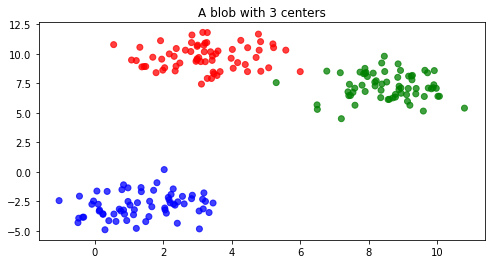

In [25]:
from matplotlib import pyplot as plt
blobs = d.make_blobs(200)
f = plt.figure(figsize=(8, 4))
ax = f.add_subplot(111)
ax.set_title("A blob with 3 centers")
colors = np.array(['r', 'g', 'b'])
ax.scatter(blobs[0][:, 0], blobs[0][:, 1], color=colors[blobs[1]
.astype(int)], alpha=0.75)

## 把数据调整为标准正态分布

经常需要将数据标准化调整（scaling）为标准正态分布（standard normal）。标准正态分布算得上是统计学中最重要的分布了。如果你学过统计，Z值表（z-scores）应该不陌生。实际上，Z值表的作用就是把服从某种分布的特征转换成标准正态分布的Z值。

### Getting ready
数据标准化调整是非常有用的。许多机器学习算法在具有不同范围特征的数据中呈现不同的学习效果。例如，SVM（Support Vector Machine，支持向量机）在没有标准化调整过的数据中表现很差，因为可能一个变量的范围是0-10000，而另一个变量的范围是0-1。 preprocessing 模块提供了一些函数可以将特征调整为标准形：

In [28]:
from sklearn import preprocessing
import numpy as np

### How to do it...
还用 boston 数据集运行下面的代码：

In [29]:
from sklearn import datasets
boston = datasets.load_boston()
X, y = boston.data, boston.target

In [30]:
X[:,:3].mean(axis=0)

array([  3.59376071,  11.36363636,  11.13677866])

In [31]:
X[:,:3].std(axis=0)

array([  8.58828355,  23.29939569,   6.85357058])

这里看出很多信息。首先，第一个特征的均值是三个特征中最小的，而其标准差却比第三个特征的标准差大。第二个特征的均值和标准差都是最大的——说明它的值很分散，我们通过 preprocessing 对它们标准化：

In [33]:
X_2 = preprocessing.scale(X[:,:3])

In [34]:
X_2.mean(axis=0)

array([  6.34099712e-17,  -6.34319123e-16,  -2.68291099e-15])

In [35]:
X_2.std(axis=0)

array([ 1.,  1.,  1.])

### How it works...
中心化与标准化函数很简单，就是减去均值后除以标准差，公式如下所示：
$$x= \frac {x- \bar x} \sigma$$
除了这个函数，还有一个中心化与标准化类，与管线命令（Pipeline）联合处理大
数据集时很有用。单独使用一个中心化与标准化类实例也是有用处的：

In [44]:
my_scaler = preprocessing.StandardScaler()
my_scaler.fit(X[:,:3])
my_scaler.transform(X[:,3]).mean(axis=0)

D:\MyConfiguration\cp14330\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


ValueError: operands could not be broadcast together with shapes (506,) (3,) (506,) 

通过 MinMaxScaler 类可以很容易将默认的区间 0 到 1 修改为需要的区间：

In [43]:
my_old_scaler = preprocessing.MinMaxScaler(feature_range=(-3.14,3.14))
my_old_scaler.fit(X[:,:3])
my_old_scaler.transform(X[:,:3]).max(axis=0)

array([ 3.14,  3.14,  3.14])

还有一种方法是正态化（normalization）。它会将每个样本长度标准化为1。这种方法和前面介绍的不同，它的特征值是标量。正态化代码如下：

In [45]:
normalized_X = preprocessing.normalize(X[:,:3])

乍看好像没什么用，但是在求欧式距离（相似度度量指标）时就很必要了。例如三个样本分别是向量 (1,1,0) ， (3,3,0) ， (1,-1,0) 。样本1与样本3的距离比样本1与样本2的距离短，尽管样本1与样本3是轴对称，而样本1与样本2只是比例不同而已。由于距离常用于相似度检测，因此建模之前如果不对数据进行正态化很可能会造成失误。

### There's more...
数据填补（data imputation）是一个内涵丰富的主题，在使用scikit-learn的数据填补功能时需要注意以下两点。创建幂等标准化（idempotent scaler）对象有时可能需要标准化 StandardScaler 实例的均值和/或方差。例如，可能（尽管没用）会经过一系列变化创建出一个与原来完全相同的 StandardScaler ：

In [47]:
my_useless_scaler = preprocessing.StandardScaler(with_mean=False, with_std=False)
transformed_sd = my_useless_scaler.fit_transform(X[:, :3]).std(axis=0)
original_sd = X[:, :3].std(axis=0)
np.array_equal(transformed_sd, original_sd)

True

处理稀疏数据填补

在标准化处理时，稀疏矩阵的处理方式与正常矩阵没太大不同。这是因为数据经过中心化处理后，原来的 0 值会变成非 0 值，这样稀疏矩阵经过处理就不再稀疏了：

In [49]:
import scipy
matrix = scipy.sparse.eye(100)
preprocessing.scale(matrix,with_mean=False)

<100x100 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Column format>

## 用阈值创建二元特征
在前一个主题，我们介绍了数据转换成标准正态分布的方法。现在，我们看看另一种完全不同的转换方法。当不需要呈标准化分布的数据时，我们可以不处理它们直接使用；但是，如果有足够理由，直接使用也许是聪明的做法。通常，尤其是处理连续数据时，可以通过建立二元特征来分割数据。

### Getting ready
通常建立二元特征是非常有用的方法，不过要格外小心。我们还是用 boston 数据集来学习如何创建二元特征。首先，加载 boston 数据集：

In [54]:
from sklearn import datasets
import numpy as np
boston = datasets.load_boston()

### How to do it...
与标准化处理类似，scikit-learn有两种方法二元特征：
1. preprocessing.binarize （一个函数）
2. preprocessing.Binarizer （一个类）

boston 数据集的因变量是房子的价格中位数（单位：千美元）。这个数据集适合测试回归和其他连续型预测算法，但是假如现在我们想预测一座房子的价格是否高于总体均值。要解决这个问题，我们需要创建一个均值的阈值。如果一个值比均值大，则为 1 ；否则，则为 0 ：

In [55]:
from sklearn import preprocessing
new_target = preprocessing.binarize(boston.target, threshold=boston.target.mean())
new_target[0,:5]

D:\MyConfiguration\cp14330\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1.,  0.,  1.,  1.,  1.])

既然Numpy已经很简单了，为什么还要用scikit-learn的函数呢？管道命令，将在用管道命令联接多个预处理步骤一节中介绍，会解释这个问题；要用管道命令就要用 Binarizer 类：

In [56]:
bin_1 = preprocessing.Binarizer(boston.target.mean())
new_target = bin_1.fit_transform(boston.target)
new_target[0,:5]

D:\MyConfiguration\cp14330\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
D:\MyConfiguration\cp14330\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1.,  0.,  1.,  1.,  1.])

### How it works...
方法看着非常简单；其实scikit-learn在底层创建一个检测层，如果被监测的值比阈值大就返回 Ture 。然后把满足条件的值更新为 1 ，不满足条件的更新为 0 。
### There's more...
让我们再介绍一些稀疏矩阵和 fit 方法的知识。

稀疏矩阵

稀疏矩阵的 0 是不被存储的；这样可以节省很多空间。这就为 binarizer 造成了问题，需要指定阈值参数 threshold 不小于 0 来解决，如果 threshold 小
于 0 就会出现错误：

In [57]:
from scipy.sparse import coo
spar = coo.coo_matrix(np.random.binomial(1, .25, 100))
preprocessing.binarize(spar, threshold=-1)

ValueError: Cannot binarize a sparse matrix with threshold < 0

fit 方法

binarizer 类里面有 fit 方法，但是它只是通用接口，并没有实际的拟合操作，仅返回对象。

## 分类变量处理
分类变量是经常遇到的问题。一方面它们提供了信息；另一方面，它们可能是文本形式——纯文字或者与文字相关的整数——就像表格的索引一样。因此，我们在建模的时候往往需要将这些变量量化，但是仅仅用简单的 id 或者原来的形式是不行的。因为我们也需要避免在上一节里通过阈值创建二元特征遇到的问题。如果我们把数据看成是连续的，那么也必须解释成连续的。

### Getting ready
这里 boston 数据集不适合演示。虽然它适合演示二元特征，但是用来创建分类变量不太合适。因此，这里用 iris 数据集演示。解决问题之前先把问题描述清楚。假设有一个问题，其目标是预测花萼的宽度；那么花的种类就可能是一个有用的特征。首先，让我们导入数据：

In [66]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

现在 X 和 y 都获得了对应的值，我们把它们放到一起

In [59]:
import numpy as np
d = np.column_stack((X,y))

### How to do it...
下面我们把花类型 y 对应那一列转换成分类特征：

In [70]:
from sklearn import preprocessing
text_encoder =  preprocessing.OneHotEncoder()
text_encoder.fit_transform(d[:,-1:]).toarray()[:5]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

### How it works...
这里，编码器为每个分类变量创建了额外的特征，转变成一个稀疏矩阵。矩阵是这样定义的：每一行由0和1构成，对应的分类特征是1，其他都是0。用稀疏矩阵存储数据很合理。

text_encoder 是一个标准的scikit-learn模型，可以重复使用：

In [71]:
text_encoder.transform(np.ones((3, 1))).toarray()

array([[ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.]])

### There's more...
在scikit-learn和Python库中，还有一些方法可以创建分类变量。如果你更倾向于用scikit-learn，而且分类编码原则很简单，可以试试 DictVectorizer 。如果你需要处理更复杂的分类编码原则， patsy 是很好的选择。

***DictVectorizer***

DictVectorizer 可以将字符串转换成分类特征：

In [72]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer
my_dict =[{'Species':iris.target_names[i]} for i in y ]
dv.fit_transform(my_dict).toarray()[:5]

TypeError: fit_transform() missing 1 required positional argument: 'X'

## 标签特征二元化
在这个主题中，我们将用另一种方式来演示分类变量。有些时候只有一两个分类特征是重要的，这时就要避免多余的维度，如果有多个分类变量就有可能会出现这些多余的维度。

### Getting ready
处理分类变量还有另一种方法，不需要通过 OneHotEncoder ，我们可以用 LabelBinarizer 。这是一个阈值与分类变量组合的方法。演示其用法之前，让我们加载 iris 数据集：

In [80]:
from sklearn import datasets as d
irirs = d.load_iris()
target = iris.target

### How to do it...
导入 LabelBinarizer() 创建一个对象：

In [81]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()

现在，将因变量的值转换成一个新的特征向量：

In [82]:
new_target = label_binarizer.fit_transform(target)

### How it works...
iris 的因变量基数为 3 ，就是说有三种值。当 LabelBinarizer 将$N \times1$向量转换成$N \times C$矩阵时，$C$就是$N \times 1$向量的基数。需要注意的是，当 label_binarizer 处理因变量之后，再转换基数以外的值都是 [0,0,0] ：

In [84]:
label_binarizer.transform([4])

array([[0, 0, 0]])

### There's more...
0和1并不一定都是表示因变量中的阳性和阴性实例。例如，如果我们需要用 1000 表示阳性值，用 -1000 表示阴性值，我们可以用 label_binarizer 处理：

In [85]:
label_binarizer = LabelBinarizer(neg_label = -1000,pos_label = 1000)
label_binarizer.fit_transform(target)[:5]

array([[ 1000, -1000, -1000],
       [ 1000, -1000, -1000],
       [ 1000, -1000, -1000],
       [ 1000, -1000, -1000],
       [ 1000, -1000, -1000]])

阳性和阴性值的唯一限制是，它们必须为整数。

## 处理缺失值
实践中数值计算不可或缺，好在有很多方法可用，这个主题将介绍其中一些。不过，这些方法未必能解决你的问题。scikit-learn有一些常见的计算方法，它可以对现有数据进行变换填补 NA 值。但是，如果数据集中的缺失值是有意而为之的——例如，服务器响应时间超过100ms——那么更合适的方法是用其他包解决，像处理贝叶斯问题的PyMC，处理风险模型的lifelines，或者自己设计一套方法。

In [86]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
iris_X = iris.data
masking_array = np.random.binomial(1,.25,iris_X.shape).astype(bool)
iris_X[masking_array] = np.nan

让我们看看这几行代码，Numpy和平时用法不太一样，这里是在数组中用了一个数组作为索引。为了创建了随机的缺失值，先创建一个随机布尔值数组，其形状和 iris_X 数据集的维度相同。然后，根据布尔值数组分配缺失值。因为每次运行都是随机数据，所以 masking_array 每次都会不同。

### How to do it...
本书贯穿始终的一条原则（由于scikit-learn的存在）就是那些拟合与转换数据集的类都是可用的，可以在其他数据集中继续使用。具体演示如下所示：

In [95]:
from sklearn import datasets
impute = preprocessing.Imputer()
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[0:5]

array([[ 5.1       ,  3.03486239,  1.4       ,  0.2       ],
       [ 4.9       ,  3.03486239,  1.4       ,  1.16956522],
       [ 4.7       ,  3.2       ,  1.3       ,  0.2       ],
       [ 4.6       ,  3.1       ,  1.5       ,  0.2       ],
       [ 5.        ,  3.6       ,  3.92      ,  0.2       ]])

### How it works...
上面的计算可以通过不同的方法实现。默认是均值 mean ，一共是三种：
1. 均值 mean （默认方法）
2. 中位数 median
3. 众数 most_frequent

scikit-learn会用指定的方法计算数据集中的每个缺失值，然后把它们填充好。例如，用 median 方法重新计算 iris_X ，重新初始化 impute 即可：

In [90]:
impute = preprocessing.Imputer(strategy='median')
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[0:5]

array([[ 5.1,  3. ,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  1.3],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  4.5,  0.2]])

如果数据有缺失值，后面计算过程中可能会出问题。例如，在How to do it...一节里面， np.nan 作为默认缺失值，但是缺失值有很多表现形式。有时用 -1 表示。为了处理这些缺失值，可以在方法中指定那些值是缺失值。方法默认缺失值表现形式是 Nan ，就是 np.nan 的值。假设我们将 iris_X 的缺失值都用 -1 表示。看着很奇怪，但是 iris 数据集的度量值不可能是负数，因此用 -1 表示缺失值完全合理：

In [96]:
impute = preprocessing.Imputer(missing_values = -1)
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[:5]

D:\MyConfiguration\cp14330\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\ma\core.py:852: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)


array([], shape=(5, 0), dtype=float64)

## 用管线命令处理多个步骤


管线命令不经常用，但是很有用。它们可以把多个步骤组合成一个对象执行。这样可以更方便灵活地调节和控制整个模型的配置，而不只是一个一个步骤调节。

### Getting ready
这是我们把多个数据处理步骤组合成一个对象的第一部分。在scikit-learn里称为 pipeline 。这里我们首先通过计算处理缺失值；然后将数据集调整为均值为
0，标准差为1的标准形。让我们创建一个有缺失值的数据集，然后再演示 pipeline 的用法：

In [98]:
from sklearn import datasets
import numpy as np
mat = datasets.make_spd_matrix(10)
masking_array = np.random.binomial(1, .1, mat.shape).astype(bool)
mat[masking_array] = np.nan
mat[:4, :4]

array([[ 0.67827068,         nan,  0.07329614, -0.41594423],
       [-0.19353972,  1.10669517, -0.69067643,  1.20851842],
       [ 0.07329614,         nan,  1.43259419, -1.91827276],
       [-0.41594423,  1.20851842, -1.91827276,  4.10414157]])

### How to do it...
如果不用管线命令，我们可能会这样实现：

In [101]:
from sklearn import preprocessing
impute = preprocessing.Imputer()
scaler = preprocessing.StandardScaler()
mat_impute = impute.fit_transform(mat)
mat_scale = scaler.fit_transform(mat_impute)

现在我们用 pipeline 来演示：

In [102]:
from sklearn import pipeline
pipe = pipeline.Pipeline([('impute', impute), ('scaler', scaler)])

然后在调用 pipe 的 fit_transform 方法，就可以把多个步骤组合成一个对象了：

In [104]:
new_mat = pipe.fit_transform(mat)

可以用Numpy验证一下结果：

In [106]:
np.array_equal(new_mat,mat_scale)

True

### How it works...
前面曾经提到过，每个scikit-learn的算法接口都类似。 pipeline 最重要的函数也不外乎下面三个：

1. fit
2. transform
3. fit_transform

具体来说，如果管线命令有 N 个对象，前 N-1 个对象必须实现 fit 和 transform ，第 N 个对象至少实现 fit 。否则就会出现错误。如果这些条件满足，管线命令就会运行，但是不一定每个方法都可以。例如， pipe 有个 inverse_transform 方法就是这样。因为由于计算步骤没有 inverse_transform 方法，一运行就有错误：

In [113]:
pipe.inverse_transform(new_mat)

AttributeError: 'Imputer' object has no attribute 'inverse_transform'

只要把管线命令设置好，它就会如愿运行。它就是一组 for 循环，对每个步骤执行 fit 和 transform ，然后把结果传递到下一个变换操作中。使用管线命令的理由主要有两点：

1. 首先是方便。代码会简洁一些，不需要重复调用 fit 和 transform 。
2. 其次，也是更重要的作用，就是使用交叉验证。模型可以变得很复杂。如果管线命令中的一个步骤调整了参数，那么它们必然需要重新测试；测试一个步骤参数的代码管理成本是很低的。但是，如果测试5个步骤的全部参数会变都很复杂。管线命令可以缓解这些负担。

## 用主成分分析降维


现在是时候升一级了！主成分分析（Principal component analysis，PCA）是本书介绍的第一个高级技术。到目前为止都是些简单的统计学知识，而PCA将统计学和线性代数组合起来实现降维，堪称简单模型的杀手锏。

### Getting ready
PCA是scikit-learn的一个分解模块。还有一些分解模块后面会介绍。让我们用 iris 数据集演示一下，你也可以用自己的数据集：

In [114]:
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data

### How to do it...

1. 首先导入分解模块
2. 然后，初始化一个PCA对象

In [115]:
from sklearn import decomposition

In [116]:
pca = decomposition.PCA()

In [118]:
iris_pca = pca.fit_transform(iris_X)
iris_pca[:5]

array([[ -2.68420713e+00,   3.26607315e-01,  -2.15118370e-02,
          1.00615724e-03],
       [ -2.71539062e+00,  -1.69556848e-01,  -2.03521425e-01,
          9.96024240e-02],
       [ -2.88981954e+00,  -1.37345610e-01,   2.47092410e-02,
          1.93045428e-02],
       [ -2.74643720e+00,  -3.11124316e-01,   3.76719753e-02,
         -7.59552741e-02],
       [ -2.72859298e+00,   3.33924564e-01,   9.62296998e-02,
         -6.31287327e-02]])

In [119]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

### How it works...
PCA是在数据分析中有一般性的数学定义和具体的应用场景。PCA用正交向量集表示原始数据集。通常，PCA将原始数据集映射到新的空间中，里面每个列向量都是彼此正交的。从数据分析的视角看，PCA将数据集的协方差矩阵变换成若干能够“解释”一定比例变量的列向量。例如，在 iris 数据集中，92.5%的变量可以由第一个主成份表示。

数据分析里面维度多会导致维度灾难，因此降维至关重要。通常算法处理高维训练集时会出现拟合过度（overfit）的情况，于是难以把握测试集的一般性特征。如果数据集的真实结构可以用更少的维度表示，那么通常都值得一试。为了演示这点，我们用PCA将 iris 数据集转换成二维数据。 iris 数据集用全部的维度通常可以很好的分类：

In [120]:
pca = decomposition.PCA(n_components=2)
iris_X_prime = pca.fit_transform(iris_X)
iris_X_prime.shape

(150, 2)

我们的矩阵现在是$150 \times 2$，不是$150 \times 4$了。二维变量更容易可视化：

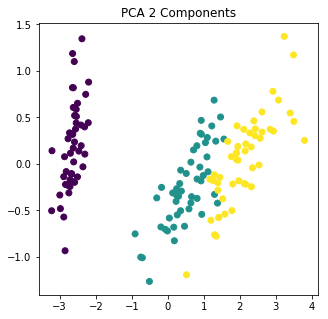

In [122]:
%matplotlib inline
from matplotlib import pyplot as plt
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(111)
ax.scatter(iris_X_prime[:,0], iris_X_prime[:, 1], c = iris.target)
ax.set_title('PCA 2 Components')

### There's more...
PCA对象还可以一开始设置解释变量的比例。例如，如果我们想介绍98%的变量，PCA对象就可以这样创建：

In [124]:
pca = decomposition.PCA(n_components=.98)
iris_X_prime = pca.fit_transform(iris_X)
pca.explained_variance_ratio_.sum()
iris_X_prime.shape

(150, 3)

## 用因子分析降维
因子分析（factor analysis）是另一种降维方法。与PCA不同的是，因子分析有假设而PCA没有假设。因子分析的基本假设是有一些隐藏特征与数据集的特征相关。这个主题将浓缩（boil down）样本数据集的显性特征，尝试像理解因变量一样地理解自变量之间的隐藏特征。

### Getting ready
让我们再用 iris 数据集来比较PCA与因子分析，首先加载因子分析类：

In [125]:
from sklearn import datasets
from sklearn.decomposition import FactorAnalysis
iris = datasets.load_iris()

### How to do it...
从编程角度看，两种方法没啥区别：

In [126]:
fa = FactorAnalysis(n_components=2)
iris_two_dim = fa.fit_transform(iris.data)
iris_two_dim[:5]

array([[-1.33125848, -0.55846779],
       [-1.33914102,  0.00509715],
       [-1.40258715,  0.307983  ],
       [-1.29839497,  0.71854288],
       [-1.33587575, -0.36533259]])

由于因子分析是一种概率性的转换方法，我们可以通过不同的角度来观察，例如模型观测值的对数似然估计值，通过模型比较对数似然估计值会更好。因子分析也有不足之处。由于你不是通过拟合模型直接预测结果，拟合模型只是一个中间步骤。这本身并非坏事，但是训练实际模型时误差就会产生

### How it works...
因子分析与前面介绍的PCA类似。但两者有一个不同之处。PCA是通过对数据进行线性变换获取一个能够解释数据变量的主成分向量空间，这个空间中的每个主成分向量都是正交的。你可以把PCA看成是$N$维数据集降维成$M$维，其中$M \lt N$。而因子分析的基本假设是，有$M$个重要特征和它们的线性组合（加噪声），能够构成原始的$N$维数据集。也就是说，你不需要指定结果变量（就是最终生成$N$维），而是要指定数据模型的因子数量（$M$个因子）。

## 用核PCA实现非线性降维
由于大多数统计方法最开始都是线性的，所以，想解决非线性问题，就需要做一些调整。PCA也是一种线性变换。本主题将首先介绍它的非线性形式，然后介绍如何降维。

### Getting ready
如果数据都是线性的，生活得多容易啊，可惜现实并非如此。核主成分分析（Kernel PCA）可以处理非线性问题。数据先通过核函数（kernel function）转换成一个新空间，然后再用PCA处理。要理解核函数之前，建议先尝试如何生成一个能够通过核PCA里的核函数线性分割的数据集。下面我们用余弦核（cosine kernel）演示。这个主题比前面的主题多一些理论。
### How to do it...
余弦核可以用来比例样本空间中两个样本向量的夹角。当向量的大小（magnitude）用传统的距离度量不合适的时候，余弦核就有用了。向量夹角的余弦公式如下：

$$cos(\theta)=\frac {A \cdot B} {{\begin{Vmatrix} A \end{Vmatrix}} {\begin{Vmatrix}B \end{Vmatrix}}}$$
向量$A$和$B$夹角的余弦是两向量点积除以两个向量各自的L2范数。向量$A$和$B$的大小不会影响余弦值。

让我们生成一些数据来演示一下用法。首先，我们假设有两个不同的过程数据
（process），称为$A$和$B$：

In [127]:
import numpy as np
A1_mean = [1, 1]
A1_cov = [[2, .99], [1, 1]]
A1 = np.random.multivariate_normal(A1_mean, A1_cov, 50)
A2_mean = [5, 5]
A2_cov = [[2, .99], [1, 1]]
A2 = np.random.multivariate_normal(A2_mean, A2_cov, 50)
A = np.vstack((A1, A2))
B_mean = [5, 0]
B_cov = [[.5, -1], [.9, -.5]]
B = np.random.multivariate_normal(B_mean, B_cov, 100)

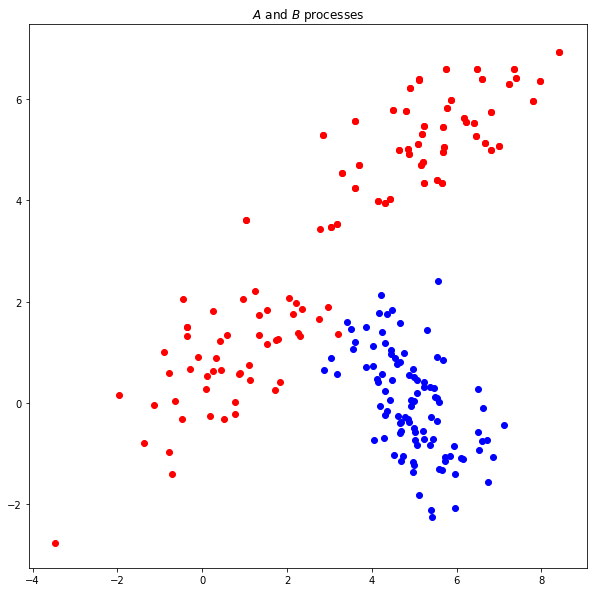

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
f = plt.figure(figsize=(10, 10))
ax = f.add_subplot(111)
ax.set_title("$A$ and $B$ processes")
ax.scatter(A[:, 0], A[:, 1], color='r')
ax.scatter(A2[:, 0], A2[:, 1], color='r')
ax.scatter(B[:, 0], B[:, 1], color='b')

上图看起来明显是两个不同的过程数据，但是用一超平面分割它们很难。因此，我
们用前面介绍带余弦核的核PCA来处理：

In [129]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='cosine', n_components=1)
AB = np.vstack((A, B))
AB_transformed = kpca.fit_transform(AB)

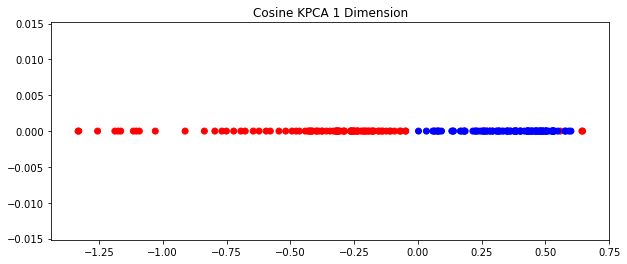

In [130]:
A_color = np.array(['r']*len(B))
B_color = np.array(['b']*len(B))
colors = np.hstack((A_color, B_color))
f = plt.figure(figsize=(10, 4))
ax = f.add_subplot(111)
ax.set_title("Cosine KPCA 1 Dimension")
ax.scatter(AB_transformed, np.zeros_like(AB_transformed), color=
colors);

用带余弦核的核PCA处理后，数据集变成了一维。如果用PCA处理就是这样：

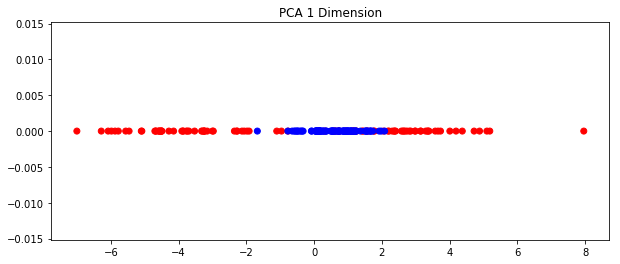

In [132]:
from sklearn.decomposition import PCA
pca = PCA(1)
AB_transformed_Reg = pca.fit_transform(AB)
f = plt.figure(figsize=(10, 4))
ax = f.add_subplot(111)
ax.set_title("PCA 1 Dimension")
ax.scatter(AB_transformed_Reg, np.zeros_like(AB_transformed_Reg), color=colors)


很明显，核PCA降维效果更好。

### How it works...
scikit-learn提供了几种像余弦核那样的核函数，也可以写自己的核函数。默认的函数有：

1. 线性函数（linear）（默认值）
2. 多项式函数（poly）
3. 径向基函数（rbf，radial basis function）
4. S形函数（sigmoid）
5. 余弦函数（cosine）
6. 用户自定义函数（precomputed）

还有一些因素会影响核函数的选择。例如， degree 参数可以设
置 poly ， rbf 和 sigmoid 核函数的角度；而 gamma 会影
响 rbf 和 poly 核，更多详情请查看 KernelPCA 文档。
后面关于支持向量机（SVM）的主题中将会进一步介绍 rbf 核函数。
需要注意的是：核函数处理非线性分离效果很好，但是一不小心就可能导致拟合过
度。

## 用截断奇异值分解降维
截断奇异值分解（Truncated singular value decomposition，TSVD）是一种矩阵因
式分解（factorization）技术，将矩阵$M$分解成$U$，$\Sigma$和$V$。它与PCA
很像，只是SVD分解是在数据矩阵上进行，而PCA是在数据的协方差矩阵上进行。
通常，SVD用于发现矩阵的主成份。

### Getting ready
TSVD与一般SVD不同的是它可以产生一个指定维度的分解矩阵。例如，有一个$n
\times n$矩阵，通过SVD分解后仍然是一个$n \times n$矩阵，而TSVD可以生成指
定维度的矩阵。这样就可以实现降维了。
这里我们还用 iris 数据集来演示TSVD：

In [133]:
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data

### How to do it...
TSVD对象的用法和其他对象类似。首先导入需要的类，初始化，然后拟合：

In [134]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD()
iris_transformed = svd.fit_transform(iris_data)
iris_data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [135]:
iris_transformed[:5]

array([[ 5.91220352,  2.30344211],
       [ 5.57207573,  1.97383104],
       [ 5.4464847 ,  2.09653267],
       [ 5.43601924,  1.87168085],
       [ 5.87506555,  2.32934799]])

最终结果如下图所示：

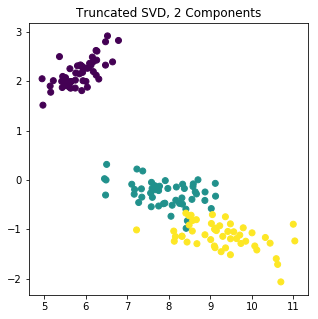

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure(figsize=(5, 5))
ax = f.add_subplot(111)
ax.scatter(iris_transformed[:, 0], iris_transformed[:, 1], c=iris.target)
ax.set_title("Truncated SVD, 2 Components")

### How it works...
现在我们演示了scikit-learn的 TruncatedSVD 模块，让我们看看只用 scipy 学习
一些细节。
首先，我们用 scipy 的 linalg 处理SVD：

In [139]:
import numpy as np
from scipy.linalg import svd
D = np.array([[1, 2], [1, 3], [1, 4]])
D

array([[1, 2],
       [1, 3],
       [1, 4]])

In [140]:
U, S, V = svd(D, full_matrices=False)
U.shape, S.shape, V.shape

((3, 2), (2,), (2, 2))

我们可以根据SVD的定义，用$U$，$S$和$V$还原矩阵$D$：

In [141]:
np.diag(S)

array([[ 5.64015854,  0.        ],
       [ 0.        ,  0.43429448]])

In [142]:
np.dot(U.dot(np.diag(S)), V)

array([[ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.]])

TruncatedSVD 返回的矩阵是$U$和$S$的点积。如果我们想模拟TSVD，我们就
去掉最新奇异值和对于$U$的列向量。例如，我们想要一个主成份，可以这样：

In [143]:
new_S = S[0]
new_U = U[:, 0]
new_U.dot(new_S)

array([-2.20719466, -3.16170819, -4.11622173])

一般情况下，如果我们想要截断维度$t$，那么我们就去掉$N-t$个奇异值。
### There's more...
TruncatedSVD 还有一些细节需要注意。
***符号翻转（Sign flipping）***  

TruncatedSVD 有个“陷阱”。随着随机数生成器状态的变化， TruncatedSVD 连
续地拟合会改变输出的符合。为了避免这个问题，建议只用 TruncatedSVD 拟合
一次，然后用其他变换。这正是管线命令的另一个用处。
要避免这种情况，可以这样：

In [144]:
tsvd = TruncatedSVD(2)
tsvd.fit(iris_data)
tsvd.transform(iris_data)[:5]

array([[ 5.91220352,  2.30344211],
       [ 5.57207573,  1.97383104],
       [ 5.4464847 ,  2.09653267],
       [ 5.43601924,  1.87168085],
       [ 5.87506555,  2.32934799]])

稀疏矩阵
TruncatedSVD 相比PDA的一个优势是 TruncatedSVD 可以操作PDA处理不了的
矩阵。这是因为PCA必须计算协方差矩阵，需要在整个矩阵上操作，如果矩阵太
大，计算资源可能会不够用。

## 用字典学习分解法分类
在这个主题中，我们将介绍一种可以用于分类的分解方法——字典学习
（Dictionary Learning），将数据集转换成一个稀疏的形式。

### Getting ready
DictionaryLearning 方法的思想是把特征看作构成数据集的基础。首先我们导
入 iris 数据集：

In [146]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
iris_target = iris.target

### How to do it...
首先，导入 DictionaryLearning ：

In [149]:
from sklearn.decomposition import DictionaryLearning
dl = DictionaryLearning(3)

然后用三个成分表示 iris 数据集中花的类型：

In [154]:
transformed = dl.fit_transform(iris_data[::2])
transformed[:5]

array([[ 0.        ,  6.34476574,  0.        ],
       [ 0.        ,  5.83576461,  0.        ],
       [ 0.        ,  6.32038375,  0.        ],
       [ 0.        ,  5.89318572,  0.        ],
       [ 0.        ,  5.45222715,  0.        ]])

我们可以可视化这个结果。注意，每个成分的值分别平行$x$，$y$和$z$三个轴，
其他坐标都是0；这就是稀疏性。

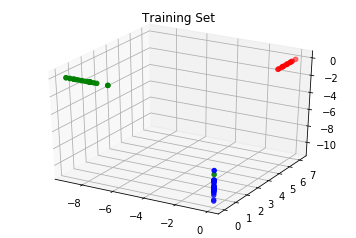

In [156]:
from mpl_toolkits.mplot3d import Axes3D
colors = np.array(list('rgb'))
f = plt.figure()
ax = f.add_subplot(111, projection='3d')
ax.set_title("Training Set")
ax.scatter(transformed[:, 0], transformed[:, 1], transformed[:, 2], color=colors[iris.target[::2]]);

如果你细心看，还是会发现一些误差。有一个样本分错了类型，虽然一个错误并不
是很严重。

下面，让我们用 fit 而不用 fit_transform 来训练数据集：

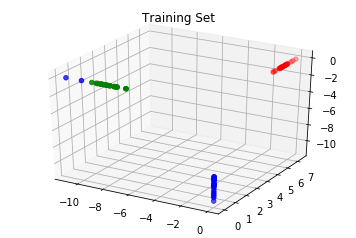

In [158]:
transformed = dl.transform(iris_data[1::2])
colors = np.array(list('rgb'))
f = plt.figure()
ax = f.add_subplot(111, projection='3d')
ax.set_title("Training Set")
ax.scatter(transformed[:, 0], transformed[:, 1], transformed[:, 2], color=colors[iris.target[1::2]])

还是有一些分类错误的样本。如果你看看之前降维主题中的图，会发现绿色和蓝色
两类数据有交叉部分。

### How it works...
DictionaryLearning 具有信号处理和神经学领域的背景知识。其理念是某一时
刻只有少数特征可以实现。因此， DictionaryLearning 在假设大多数特征都是0
的情况下，尝试发现一个适当的数据表现形式。

## 用管线命令连接多个转换方法


下面，让我们用管线命令连接多个转换方法，来演示一个复杂点儿的例子。
### Getting ready
本主题将再度释放管线命令的光芒。之前我们用它处理缺失数据，只是牛刀小试罢
了。下面我们用管线命令把多个预处理步骤连接起来处理，会非常方便。
首先，我们加载带缺失值的 iris 数据集：

In [159]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
iris_data = iris.data
mask = np.random.binomial(1, .25, iris_data.shape).astype(bool)
iris_data[mask] = np.nan
iris_data[:5]

array([[ nan,  nan,  1.4,  nan],
       [ 4.9,  3. ,  1.4,  0.2],
       [ nan,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  nan,  nan],
       [ 5. ,  3.6,  1.4,  nan]])

### How to do it...
本主题的目标是首先补全 iris_data 的缺失值，然后对补全的数据集用PCA。可
以看出这个流程需要一个训练数据集和一个对照集（holdout set）；管线命令会让
事情更简单，不过之前我们做一些准备工作。
首先加载需要的模块：

In [161]:
from sklearn import pipeline,preprocessing,decomposition

然后，建立 Imputer 和 PCA 类：

In [163]:
pca = decomposition.PCA()
imputer = preprocessing.Imputer()

有了两个类之后，我们就可以用管线命令处理：

In [165]:
pipe = pipeline.Pipeline([('imputer',imputer),('pca',pca)])
np.set_printoptions(2)
iris_data_transformed = pipe.fit_transform(iris_data)
iris_data_transformed[:5]

array([[-2.06,  0.92, -0.53,  0.19],
       [-2.68, -0.18,  0.03,  0.26],
       [-2.45,  0.75,  0.33,  0.4 ],
       [-0.45, -1.08, -0.29, -0.44],
       [-2.41,  0.29, -0.52, -0.57]])

如果我们用单独的步骤分别处理，每个步骤都要用一次 fit_transform ，而这里
只需要用一次，而且只需要一个对象。

### How it works...
管线命令的每个步骤都是用一个元组表示，元组的第一个元素是对象的名称，第二
个元素是对象。
本质上，这些步骤都是在管线命令调用时依次执行 fit_transform 方法。还有一
种快速但不太简洁的管线命令建立方法，就像我们快速建立标准化调整模型一样，
只不过用 StandardScaler 会获得更多功能。 pipeline 函数将自动创建管线命
令的名称：

In [166]:
pipe2 = pipeline.make_pipeline(imputer, pca)
pipe2.steps

[('imputer',
  Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False))]

这和前面的模型结果一样：

In [167]:
iris_data_transformed2 = pipe2.fit_transform(iris_data)
iris_data_transformed2[:5]

array([[-2.06,  0.92, -0.53,  0.19],
       [-2.68, -0.18,  0.03,  0.26],
       [-2.45,  0.75,  0.33,  0.4 ],
       [-0.45, -1.08, -0.29, -0.44],
       [-2.41,  0.29, -0.52, -0.57]])

### There's more...
管线命令连接内部每个对象的属性是通过 set_params 方法实现，其参数
用 <对象名称>__<对象参数> 表示。例如，我们设置PCA的主成份数量为2：

In [168]:
pipe2.set_params(pca__n_components=2)

Pipeline(steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

这里 n_components=2 是 pca 本身的参数。我们再演示一下，输出将是一个$N
\times 2$维矩阵：

In [169]:
iris_data_transformed3 = pipe2.fit_transform(iris_data)
iris_data_transformed3[:5]

array([[-2.06,  0.92],
       [-2.68, -0.18],
       [-2.45,  0.75],
       [-0.45, -1.08],
       [-2.41,  0.29]])

## 用正态随机过程处理回归
这个主题将介绍如何用正态随机过程（Gaussian process，GP）处理回归问题。
在线性模型部分，我们曾经见过在变量间可能存在相关性时，如何用贝叶斯岭回归
(Bayesian Ridge Regression)表示先验概率分布（prior）信息。

正态分布过程关心的是方程而不是均值。但是，如果我们假设一个正态分布的均值
为0，那么我们需要确定协方差。

这样处理就与线性回归问题中先验概率分布可以用相关系数表示的情况类似。用
GP处理的先验就可以用数据、样本数据间协方差构成函数表示，因此必须从数据
中拟合得出。具体内容参考The Gaussian Processes Web Site。

### Getting ready
首先要我们用一些数据来演示用scikit-learn处理GP：

In [172]:
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
boston_X = boston.data
boston_y = boston.target
train_set = np.random.choice([True,False], len(boston_y), p=[.75, .25])

### How to do it...
有了数据之后，我们就创建scikit-learn的 GaussianProcess 对象。默认情况下，
它使用一个常系数回归方程（constant regression function）和平方指数相关函数
（ squared exponential correlation），是最主流的选择之一：

In [173]:
from sklearn.gaussian_process import GaussianProcess
gp = GaussianProcess()
gp.fit(boston_X[train_set], boston_y[train_set])

D:\MyConfiguration\cp14330\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
D:\MyConfiguration\cp14330\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


GaussianProcess(beta0=None,
        corr=<function squared_exponential at 0x000000000CD567B8>,
        normalize=True, nugget=array(2.220446049250313e-15),
        optimizer='fmin_cobyla', random_start=1,
        random_state=<mtrand.RandomState object at 0x0000000005A61120>,
        regr=<function constant at 0x000000000CD56510>,
        storage_mode='full', theta0=array([[ 0.1]]), thetaL=None,
        thetaU=None, verbose=False)

其中.

1. beta0 ：回归权重。默认是用MLE（最大似然估计，Maximum LikelihoodEstimation）方法进行估计。
2. corr ：相关系数方程。提供了若干种方程，后面会介绍。
3. normalize ：默认是 True ，中性化调整样本值，方便应用MLE进行估计。
4. nugget ：正则化参数，是可选的，默认是一个很小的值。你可以将这个参数用于每个样本值（数是一个数值），也可以对样本值使用不同的参数（参数是一个数组，与样本值个数相等）。
5. regr ：默认是常系数回归方程。

现在让我们拟合对象看看测试效果：

In [174]:
test_preds = gp.predict(boston_X[~train_set])

让我们把预测值和实际值画出来比较一下。因为我们做了回归，还可以看看残差散
点图和残差直方图。

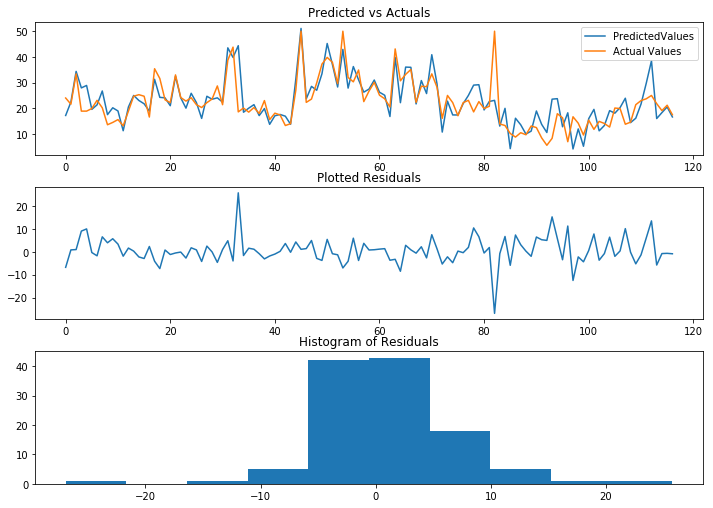

In [176]:
%matplotlib inline
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(10, 7), nrows=3)
f.tight_layout()
ax[0].plot(range(len(test_preds)), test_preds, label='PredictedValues');
ax[0].plot(range(len(test_preds)), boston_y[~train_set], label='Actual Values');
ax[0].set_title("Predicted vs Actuals")
ax[0].legend(loc='best')
ax[1].plot(range(len(test_preds)),
test_preds - boston_y[~train_set]);
ax[1].set_title("Plotted Residuals")
ax[2].hist(test_preds - boston_y[~train_set])
ax[2].set_title("Histogram of Residuals")

### How it works...
上面我们快速演示了一下，现在让我们看看这些参数，看看如何优化它们。首先，
我们看看 corr 函数的类型。这个函数描述了不同组 X 之间的相关性。scikitlearn
提供了5种函数类型：

1. 绝对值指数函数（absolute_exponential）
2. 平方指数函数（squared_exponential）
3. 广义指数函数（generalized_exponential）
4. 立方项函数（cubic）
5. 线性函数（linear）

例如，平方指数函数公式如下：
$$K= \exp {-\frac {|d|^2}{2l^2}}$$
另外，线性函数就是两个点的点积：
$$K=x^T{x'}$$
另一个参数是 theta0 ，表示参数估计的起始点。
一旦我们有了$K$和均值的估计值，过程就完全确定了，因为它是一个GP；之所以
用正态分布，是因为在机器学习中它一直很受欢迎。
下面我们换个 regr 函数类型和 theta0 参数，看看结果会如何变化：

In [177]:
gp = GaussianProcess(regr='linear', theta0=5e-1)
gp.fit(boston_X[train_set], boston_y[train_set]);
linear_preds = gp.predict(boston_X[~train_set])

D:\MyConfiguration\cp14330\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
D:\MyConfiguration\cp14330\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


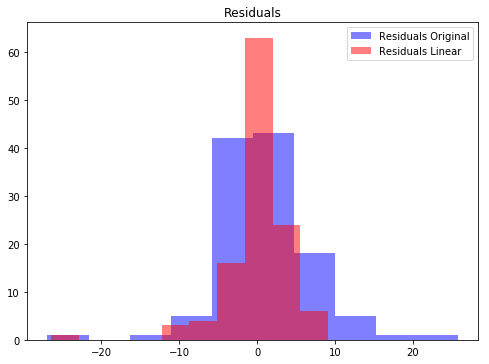

In [179]:
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(test_preds - boston_y[~train_set],label='Residuals Original', color='b', alpha=.5);
ax.hist(linear_preds - boston_y[~train_set],label='Residuals Linear', color='r', alpha=.5);
ax.set_title("Residuals")
ax.legend(loc='best')

很明显，第二个模型的预测效果大部分区间要更好。如果我们把残差汇总起来，我
们可以看看MSE预测的结果：

In [180]:
np.power(test_preds - boston_y[~train_set], 2).mean()

33.449889556026314

In [181]:
np.power(linear_preds - boston_y[~train_set], 2).mean()

17.203720213322423

### There's more...
我们可能还想掌握估计的不确定性。在我们预测的时候，如果我们 eval_MSE 设置
为 True ，我们就获得MSE的值，这时预测返回的是预测值与MSE估计值的元
组。

In [183]:
test_preds, MSE = gp.predict(boston_X[~train_set], eval_MSE=True)
MSE[:5]

array([ 31.85,  13.98,   7.84,  10.64,   8.94])

这样我们就可以计算估计的误差了。让我们画出来看看准确率：

ValueError: x and y must be the same size

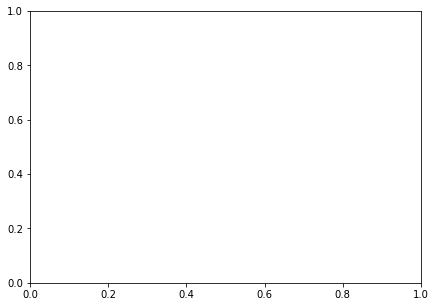

In [185]:
f, ax = plt.subplots(figsize=(7, 5))
n = 120
rng = range(n)
ax.scatter(rng, test_preds[:n])
ax.errorbar(rng, test_preds[:n], yerr=1.96*MSE[:n])
ax.set_title("Predictions with Error Bars")
ax.set_xlim((-20, 140));

## 直接定义一个正态随机过程对象


前面我们只触及了正态随机过程的表面。在本主题中，我们将介绍直接创建一个具
有指定相关函数的正态随机过程。
### Getting ready
gaussian_process 模块可以直接连接不同的相关函数与回归方程。这样就可以
不创建 GaussianProcess 对象，直接通过函数创建需要的对象。如果你更熟悉面
向对象的编程方法，这里只算是模块级的一个类方法而已。
在本主题中，我们将使用大部分函数，并把他们的结果用几个例子显示出来。如果
你想真正掌握这些相关函数的特点，不要仅仅停留在这些例子上。这里不再介绍新
的数学理论，让我们直接演示如何做。
### How to do it...
首先，我们导入要回归的数据：

In [186]:
from sklearn.datasets import make_regression
X, y = make_regression(1000, 1, 1)
from sklearn.gaussian_process import regression_models

第一个相关函数是常系数相关函数。它有若干常数构成：

In [187]:
regression_models.constant(X)[:5]

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

还有线性相关函数与平方指数相关函数，它们也是 GaussianProcess 类的默认
值：

In [188]:
regression_models.linear(X)[:1]

array([[ 1.  ,  0.56]])

In [189]:
regression_models.quadratic(X)[:1]

array([[ 1.  ,  0.56,  0.31]])

### How it works...
这样我们就可以得到回归函数了，可以直接用 GaussianProcess 对象来处理它
们。默认值是常系数相关函数，但我们也可以把轻松的把线性模型和平方指数模型
传递进去。

## 用随机梯度下降处理回归

本主题将介绍随机梯度下降法（Stochastic Gradient Descent，SGD），我们将用
它解决回归问题，后面我们还用它处理分类问题。
### Getting ready
SGD是机器学习中的无名英雄（unsung hero），许多算法的底层都有SGD的身
影。之所以受欢迎是因为其简便与快速——处理大量数据时这些都是好事儿。
SGD成为许多机器学习算法的核心的另一个原因是它很容易描述过程。在本章的最
后，我们对数据作一些变换，然后用模型的损失函数（loss function）拟合数据。
### How to do it...
如果SGD适合处理大数据集，我们就用大点儿的数据集来演示：

In [190]:
from sklearn import datasets
X, y = datasets.make_regression(int(1e6))
print('{:,}'.format(int(1e6)))

1,000,000


值得进一步了解数据对象的构成和规模信息。还在我们用的是NumPy数组，所以我
们可以获得 nbytes 。Python本身没有获取NumPy数组大小的方法。输出结果与
系统有关，你的结果和下面的数据可能不同：

In [192]:
print('{:,}'.format(X.nbytes))

800,000,000


我们把字节码 nbytes 转换成MB（megabytes），看着更直观：

In [193]:
X.nbytes / 1e6

800.0

因此，每个数据点的字节数就是：

In [195]:
X.nbytes / (X.shape[0] * X.shape[1])

8.0

这些信息和我们的目标没多大关系，不过了解数据对象的构成和规模信息还是值得
的。
现在，我们有了数据，就用 SGDRegressor 来拟合：

In [197]:
import numpy as np
from sklearn import linear_model
sgd = linear_model.SGDRegressor()
train = np.random.choice([True, False],size = len(y),p=[.75, .25])
sgd.fit(X[train], y[train])

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

这里又出现一个“充实的（beefy）”对象。重点需要了解我们的损失函数
是 squared_loss ，与线性回归里的残差平方和是一样的。还需要注
意 shuffle 会对数据产生随机搅动（shuffle），这在解决伪相关问题时很有用
scikit-learn用 fit_intercept 方法可以自动加一列1。如果想从拟合结果中看到很
多输出，就把 verbose 设为1。用scikit-learn的API预测，我们可以统计残差的分
布情况

In [198]:
linear_preds = sgd.predict(X[~train])

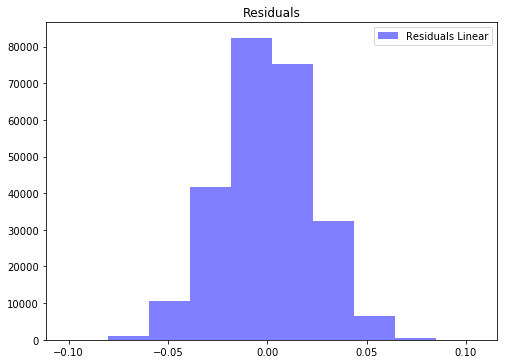

In [199]:
%matplotlib inline
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(7, 5))
f.tight_layout()
ax.hist(linear_preds - y[~train],label='Residuals Linear', color=
'b', alpha=.5);
ax.set_title("Residuals")
ax.legend(loc='best');

拟合的效果非常好。异常值很少，直方图也呈现出完美的正态分布钟形图。

### How it works...
当然这里我们用的是虚拟数据集，但是你也可以用更大的数据集合。例如，如果你
在华尔街工作，有可能每天一个市场都有20亿条交易数据。现在如果有一周或一年
的数据，用SGD算法就可能无法运行了。很难处理这么大的数据量，因为标准的梯
度下降法每一步都要计算梯度，计算量非常庞大。

标准的梯度下降法的思想是在每次迭代计算一个新的相关系数矩阵，然后用学习速
率（learning rate）和目标函数（objective function）的梯度调整它，直到相关系数
矩阵收敛为止。如果用伪代码写就是这样：

In [ ]:
while not_converged:
    w = w – learning_rate * gradient(cost(w))

这里涉及的变量包括：

1. w ：相关系数矩阵
2. learning_rate ：每次迭代时前进的长度。如果收敛效果不好，调整这个参数很重要
3. gradient ：导数矩阵
4. cost ：回归的残差平方和。后面我们会介绍，不同的分类方法中损失函数定义不同，具有可变性也是SGD应用广泛的理由之一。

除了梯度函数有点复杂之外，这个方法还是可以的。随着相关系数向量的增加，梯
度的计算也会变得越来越慢。每次更新之前，我们都需要对每个数据点计算新权
重。
SGD的工作方式稍有不同；每次迭代不是批量更新梯度，而是只更新新数据点的参
数。这些数据点是随机选择的，因此称为随机梯度下降法。